In [1]:
!pip install timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
from torchvision import datasets

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_dataset = datasets.MNIST(root='mnist_data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='mnist_data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14406662.28it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 442057.51it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3515594.42it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3905397.45it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



In [17]:
image, label = train_dataset[100]
image.shape

torch.Size([1, 28, 28])

In [18]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [19]:
class DigitNN(nn.Module):
  def __init__(self):
    super(DigitNN, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [20]:
model = DigitNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
num_epochs = 10
for epoch in range(num_epochs):
  model.train() # puts the model in training mode
  for images, labels in tqdm(train_loader):
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.0008129153284244239


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 2/10, Loss: 2.1033112716395408e-05


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3/10, Loss: 0.017036158591508865


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4/10, Loss: 7.273662777151912e-05


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5/10, Loss: 0.0735076293349266


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6/10, Loss: 0.0005120245041325688


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7/10, Loss: 0.08003508299589157


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8/10, Loss: 0.001978043233975768


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9/10, Loss: 0.011204324662685394


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10/10, Loss: 0.24749170243740082


In [29]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)
print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)}'
      f' ({accuracy:.0f}%)\n')


Test set: Average loss: 0.0019, Accuracy: 9776/10000 (98%)



In [31]:
test_dataset[1]

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

Predicted class: 5
True label: 5


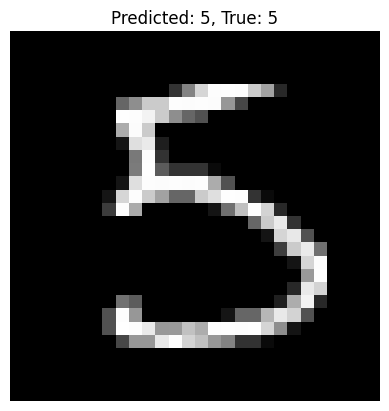

In [54]:
model.eval()

img_no = 15

# Get a single batch from the test loader (can use `next(iter(test_loader))` for simplicity)
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Choose a single image from the batch (e.g., the first image)
image = images[img_no].unsqueeze(0)  # Adding batch dimension

# Forward pass: Get predictions
with torch.no_grad():  # No need to track gradients for inference
    output = model(image)

# Get the predicted class (index of the maximum value in the output)
predicted_class = output.argmax(dim=1).item()

# Print the predicted class
print(f'Predicted class: {predicted_class}')

# (Optional) Print the true label to compare
true_label = labels[img_no].item()
print(f'True label: {true_label}')

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_class}, True: {true_label}')
plt.axis('off')
plt.show()

In [56]:
from torch.utils.data import TensorDataset, DataLoader
# Load the test.csv file
test_df = pd.read_csv('/content/test.csv')

# Convert the test data into a PyTorch tensor
test_images = test_df.values.astype(np.float32)
test_images = test_images / 255.0  # Normalize pixel values to [0, 1]
test_images = test_images.reshape(-1, 1, 28, 28)  # Reshape to (batch_size, 1, 28, 28)

# Create a TensorDataset and DataLoader
test_dataset = TensorDataset(torch.tensor(test_images))
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Set the model to evaluation mode
model.eval()

# List to store predictions
predictions = []

# Loop through the test dataset
with torch.no_grad():
    for data in test_loader:
        images = data[0]
        output = model(images)
        preds = output.argmax(dim=1).cpu().numpy()  # Get predicted labels
        predictions.extend(preds)

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(predictions) + 1),
    'Label': predictions
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)